------------------------------
## Auto correlation
----------------------------
- objective is to determine the the following
    - AR model
        - how time steps you need to consider (p term)
            - a particular at time t is influenced by how many previous values 
            
    - MA model
        - how many time steps (q term)

In [24]:
import sys
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

The Minimum Daily Temperatures dataset spans 10 years. 

In [25]:
df_temp = pd.read_csv("daily-minimum-temperatures-in-me.csv")

In [26]:
df_temp.dropna(inplace=True)

In [27]:
df_temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [28]:
df_temp['Temp'].str.isdecimal()

0       False
1       False
2       False
3       False
4       False
        ...  
3645    False
3646    False
3647    False
3648    False
3649    False
Name: Temp, Length: 3650, dtype: bool

In [29]:
df_temp.dtypes

Date    object
Temp    object
dtype: object

In [30]:
df_temp['Temp'] = pd.to_numeric(df_temp['Temp'], errors='coerce')

In [31]:
df_temp.dtypes

Date     object
Temp    float64
dtype: object

In [32]:
# Indexing with Time Series Data
df_temp = df_temp.set_index('Date')
df_temp.index

Index(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
       '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10',
       ...
       '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25', '1990-12-26',
       '1990-12-27', '1990-12-28', '1990-12-29', '1990-12-30', '1990-12-31'],
      dtype='object', name='Date', length=3650)

In [33]:
df_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [34]:
# Add columns with year, month, and weekday name
df_temp['Year']  = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

df_temp['Weekday Name'] = pd.DatetimeIndex(df_temp.index).weekday

# Display a random sampling of 5 rows
df_temp.sample(5, random_state=0)

,Temp,Year,Month,Weekday Name
Date,,,,
1990-08-20,9.7,1990,8,0
1982-07-24,6.6,1982,7,5
1983-09-19,12.0,1983,9,0
1986-09-28,6.9,1986,9,6
1988-01-12,18.3,1988,1,1


#### Line Plot

- In this plot, time is shown on the x-axis with observation values along the y-axis.


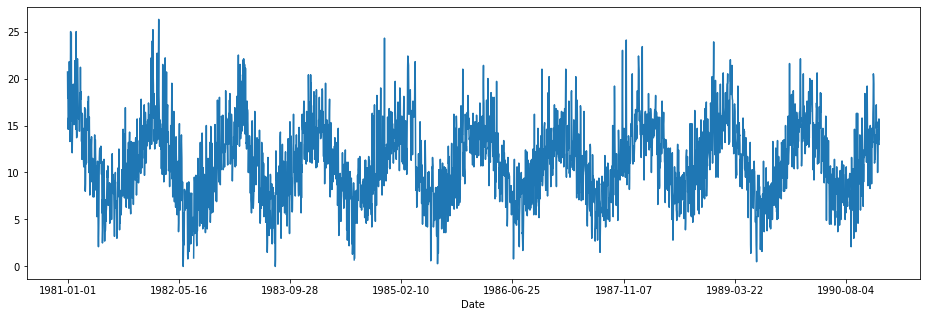

In [35]:
df_temp.Temp.plot(figsize=(16, 5));

The line plot is quite dense.

Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument).

We could change this example to use a dashed line by setting style to be ‘k–‘.

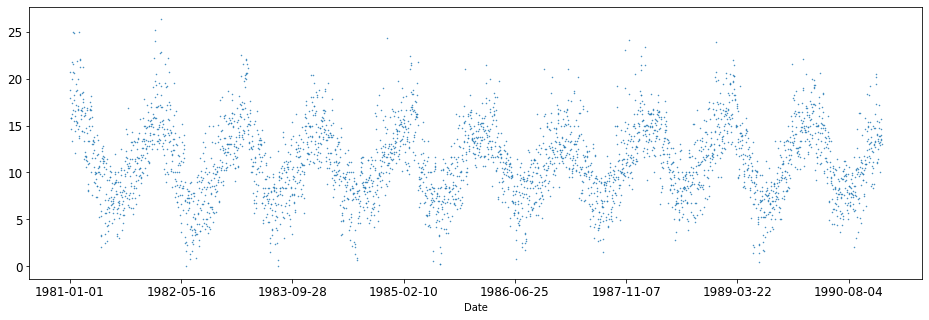

In [36]:
df_temp.Temp.plot(marker='.', 
            alpha=0.9, 
            linestyle='None', 
            ms=1,
            fontsize=12.,
            figsize=(16, 5), 
            );

#### Histogram and Density Plots

- distribution of observations

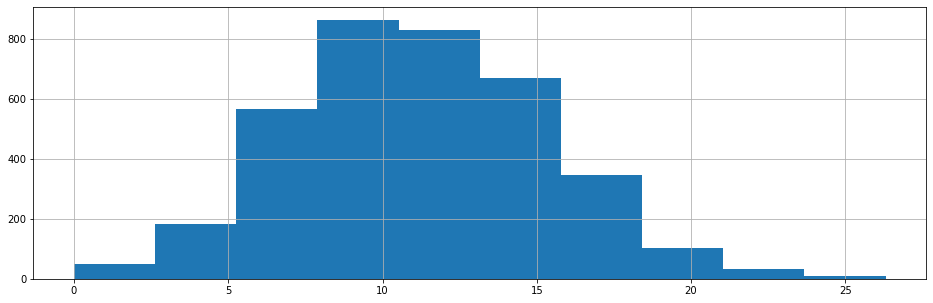

In [37]:
df_temp.Temp.hist(figsize=(16, 5));

distribution that looks strongly Gaussian

#### Box and Whisker Plots by Interval

- plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. 

- A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

-  Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

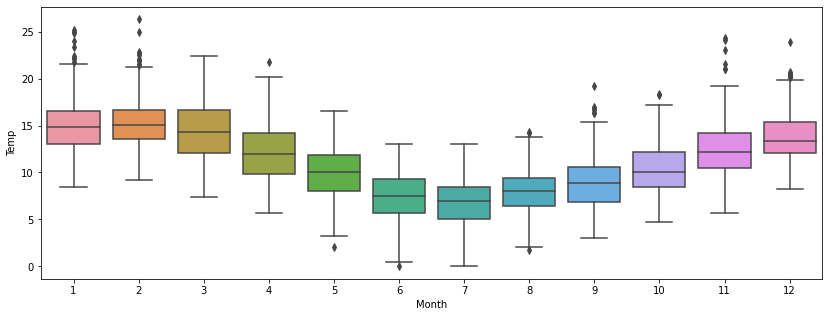

In [38]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_temp, x='Month', y='Temp');

----------------------------
#### concept of lag plots
----------------------------

- Time series modeling assumes a relationship between `an observation` and the `previous observation(s)`.

- Previous observations in a time series are called __lags__, 
    - with the observation at the previous time step called __lag1__ 
    - the observation at 2 time steps ago __lag2__

- A __Lag plot__ is a scatter plot of a time series against a lag of itself. 

- It plots the `observation` at time t on the `x-axis` and the `lag1` observation (t-1) on the `y-axis`.

    - if the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a `positive correlation` relationship.

    - If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a `negative correlation` relationship.

    #### Either relationship is `good` as they can be modeled.

    - More points tighter in to the diagonal line suggests a `stronger relationship` and more spread from the line suggests a `weaker relationship`.

    - A ball in the middle or a spread across the plot suggests a weak or no relationship.

- It is normally used to check for __autocorrelation__

    - If there is any pattern existing in the series , the series is __autocorrelated__

    - If there is no such pattern, the series is likely to be __random white noise__ (is it useful for TS analysis?)

    - In below example on `Sunspots area` time series, the plots get more and more scattered as the n_lag increases.
    
Pandas has a built-in function for exactly this called the __lag plot__. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

> Essentially, __Lag plots__ are used to check if a data set or time series is random. 

> Random data should not exhibit any structure in the lag plot. 

> The `lag argument` may be passed, 

#### Example 1

In [39]:
df_ss  = pd.read_csv("sunspotarea.csv")
df_a10 = pd.read_csv("a10.csv")

... Explanation

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

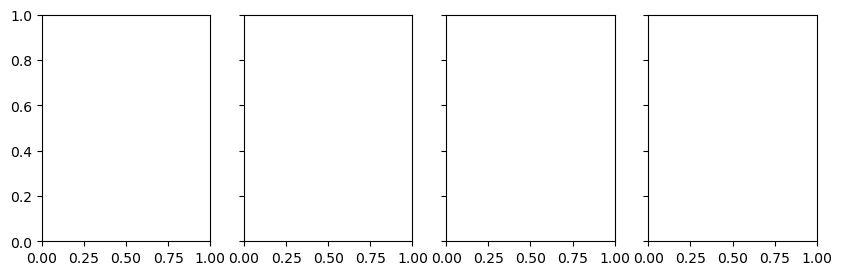

In [40]:
fig, axes = plt.subplots(1, 4, 
                         figsize=(10,3), 
                         sharex=True, 
                         sharey=True, 
                         dpi=100)
axes

In [41]:
axes.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [42]:
axes.flatten()[:4]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [43]:
for i, ax in enumerate(axes.flatten()[:4]):
    print(i, ax)

0 AxesSubplot(0.125,0.125;0.168478x0.755)
1 AxesSubplot(0.327174,0.125;0.168478x0.755)
2 AxesSubplot(0.529348,0.125;0.168478x0.755)
3 AxesSubplot(0.731522,0.125;0.168478x0.755)


... back to the main code

#### include the lag_plot function

In [44]:
from pandas.plotting import lag_plot

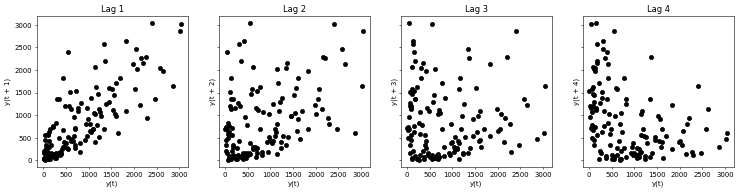

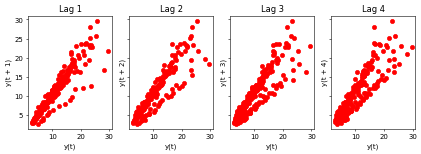

In [45]:
# Plot
fig, axes = plt.subplots(1, 4, figsize=(18 ,4), sharex=True, sharey=True, dpi=50)

for i, ax in enumerate(axes.flatten()[:4]):   
    
    lag_plot(df_ss.value, 
             lag=i+1, 
             ax=ax, 
             c='k')   
    
    ax.set_title('Lag ' + str(i+1))
    
#fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)  

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=50)

for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_a10.value, 
             lag=i+1, 
             ax=ax, 
             c='r')
    ax.set_title('Lag ' + str(i+1))

#fig.suptitle('Lag Plots of Drug Sales', y=1.05)    ;

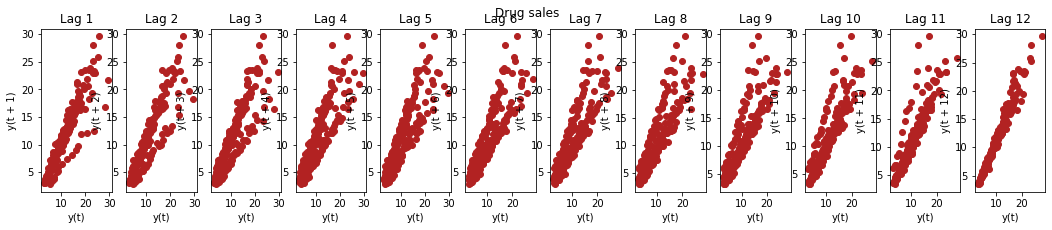

In [46]:
# Plot
fig, axes = plt.subplots(1, 12, figsize=(18,3))

fig.suptitle('Drug sales')    

for i, ax in enumerate(axes.flatten()[:12]):
    lag_plot(df_a10.value, 
             lag=i+1, 
             ax=ax, 
             c='firebrick')
    ax.set_title('Lag ' + str(i+1))

#### Example 2

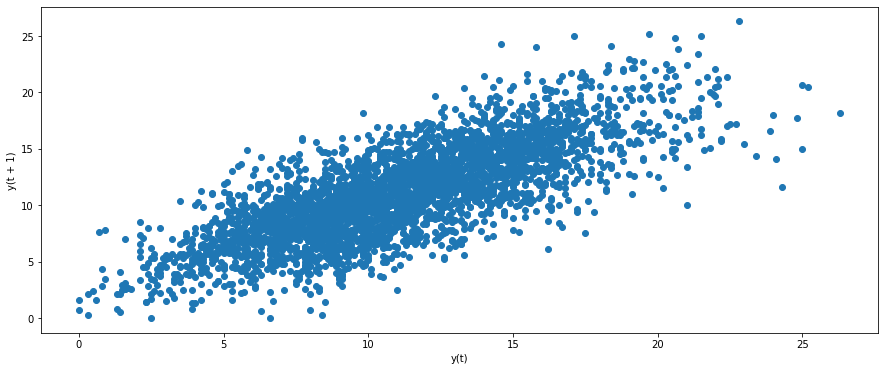

In [47]:
lag_plot(df_temp.Temp, lag=1);

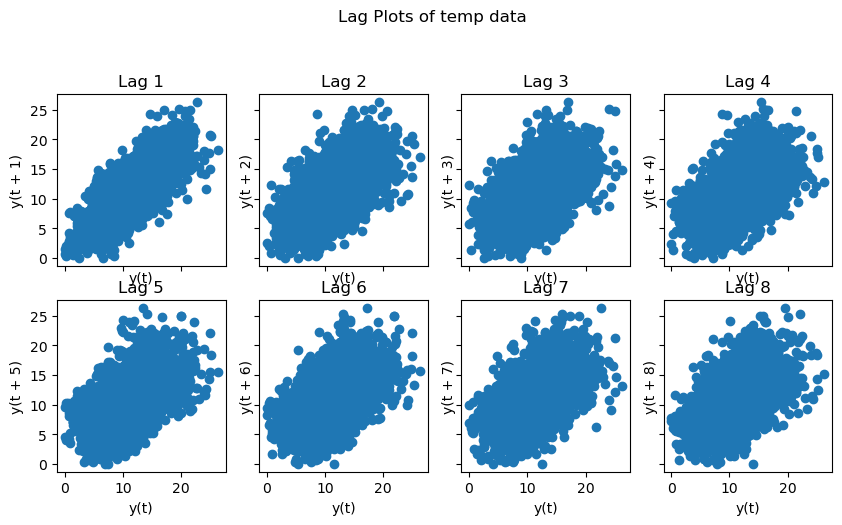

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(10,5), sharex=True, sharey=True,  dpi=100)

for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(df_temp.Temp, 
             lag =i+1, 
             ax  =ax )
    
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of temp data', y=1.05)    ;

----------------------------------
#### Autocorrelation Plots
-----------------------------------

- We can quantify the strength and type of relationship between observations and their lags.

- In statistics, this is called correlation, and when calculated against lag values in time series, it is called __autocorrelation__ (self-correlation).

- For example, an autocorrelation of order 3 returns the correlation between a time series at points (t_1 , t_2 , t_3 , ...) and its own values lagged by 3 time points, i.e. (t_4 , t_5 , t_6 , ...)


- This type of plot is called an __autocorrelation__ plot and Pandas provides this capability built in, called the __autocorrelation_plot()__ function.

If time series is random, such autocorrelations should be near zero for any and all time-lag separations. 

If time series is non-random then one or more of the autocorrelations will be significantly non-zero. 

The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. 

In [49]:
from pandas.plotting import autocorrelation_plot

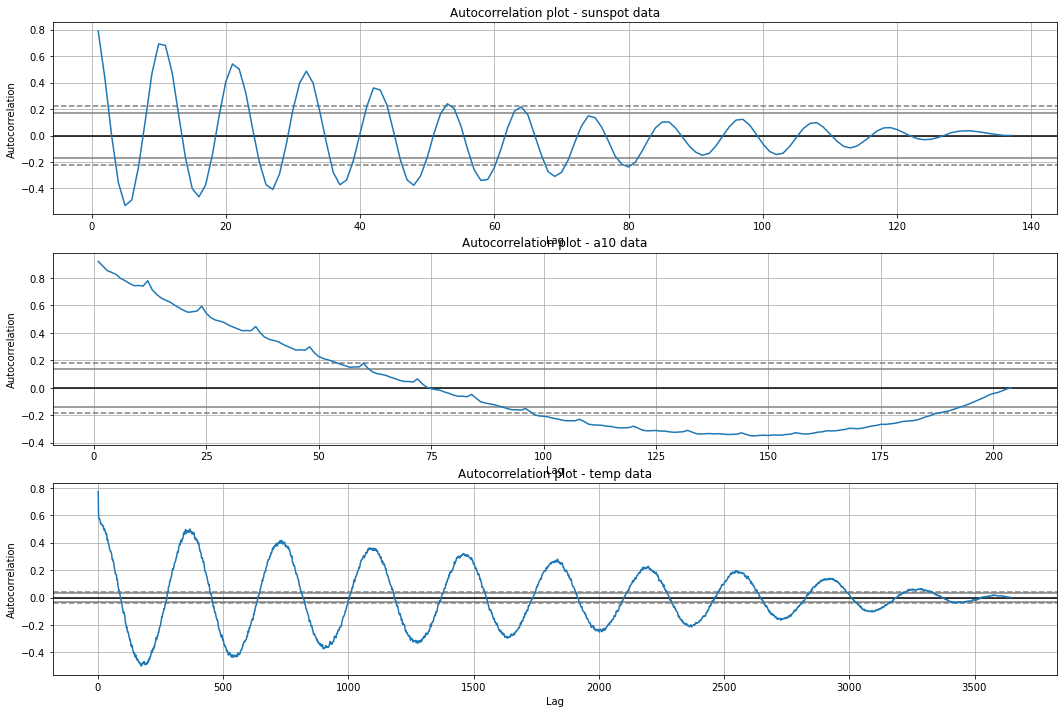

In [50]:
fig, (axes) = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))

autocorrelation_plot(df_ss.value,  ax=axes[0])
axes[0].set_title('Autocorrelation plot - sunspot data')

autocorrelation_plot(df_a10.value, ax=axes[1])
axes[1].set_title('Autocorrelation plot - a10 data');

autocorrelation_plot(df_temp.dropna().Temp.values, ax=axes[2])
axes[2].set_title('Autocorrelation plot - temp data');

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. 

> Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

#### Example - 2

In [51]:
# temps = np.random.uniform(low=68, high=65, size=(15))
temps = np.array([65.2, 
                  65.7, 
                  65.4, 
                  66, 
                  66.1, 
                  66.7, 
                  66, 
                  66.3, 
                  67.05, 
                  68.1, 
                  67.9, 
                  68.3])

n_days= temps.size
days  = np.arange(n_days)

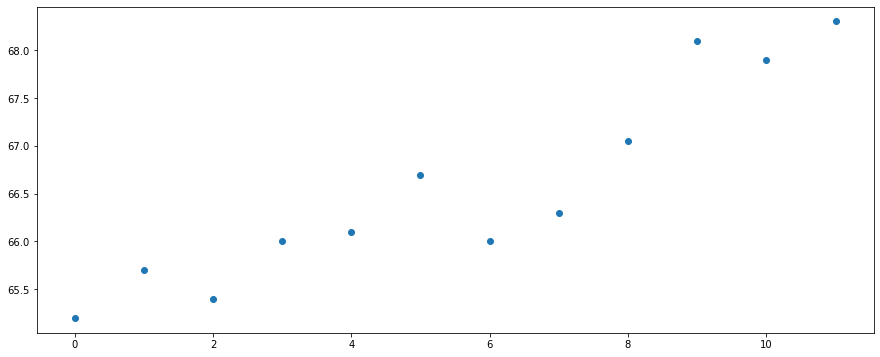

In [52]:
plt.scatter(days, temps);

In [53]:
def find_temp_error(days, temps, intercept, slope):
    #slope = temp_change/1
    
    y_pred = intercept + slope* days
    error  = temps - y_pred
    
    return error

In [54]:
slope, intercept = np.polyfit(days, temps,1)
slope, intercept

(0.2725524475524442, 65.06346153846155)

In [55]:
error = find_temp_error(days, temps, intercept, slope)
error ** 2

array([0.01864275, 0.13248582, 0.04349996, 0.01413272, 0.00288061,
       0.07495342, 0.48828821, 0.45068218, 0.03758989, 0.34054978,
       0.01232411, 0.05686391])

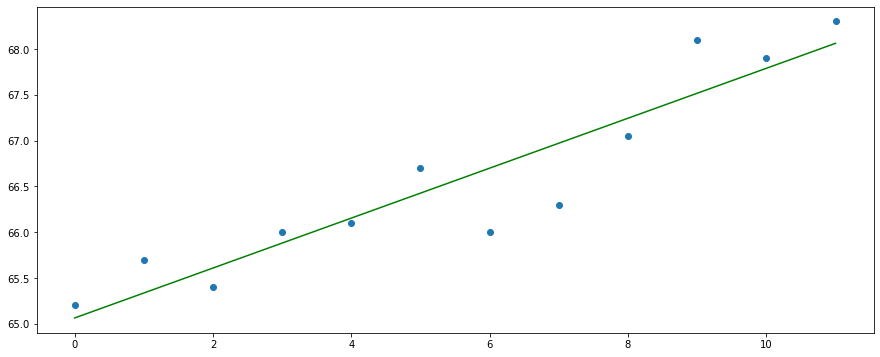

In [56]:
plt.scatter(days, temps);
plt.plot(intercept + slope* days, c='g');

#### correlation and lin regression

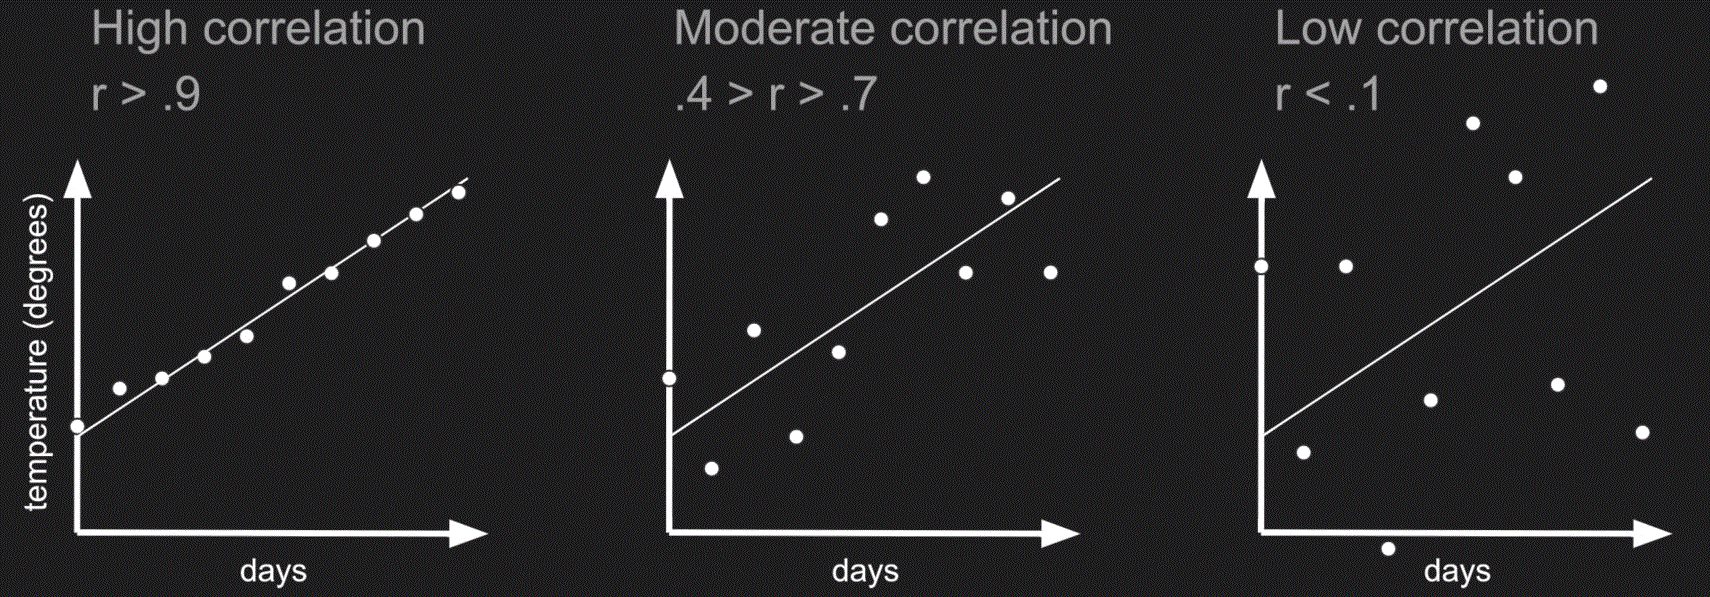

In [57]:
np.corrcoef(days, temps)

array([[1.        , 0.92948589],
       [0.92948589, 1.        ]])

indicates strong correlation

------------------------------
#### ACF and PACF Plots
-------------------------------

- __Autocorrelation__ and __partial autocorrelation__ are measures of association between current and past series values and indicate which past series values are most useful in predicting future values. 

- With this knowledge, you can determine the order of processes in an ARIMA model. 

- __Autocorrelation function (ACF)__ -  At lag $k$, this is the correlation between series values that are $k$ intervals apart.

- __Partial autocorrelation function (PACF)__ - At lag $k$, this is the correlation between series values that are $k$ intervals apart, accounting for the __values of the intervals between__.

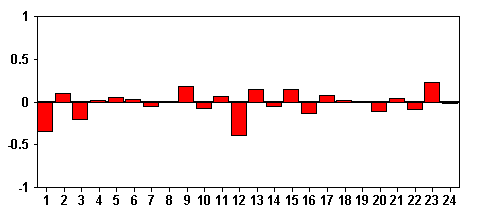

The x axis of the ACF plot indicates the lag at which the autocorrelation is computed; the y axis indicates the value of the correlation (between −1 and 1). 

For example, a spike at lag 1 in an ACF plot indicates a strong correlation between each series value and the preceding value, a spike at lag 2 indicates a strong correlation between each value and the value occurring 2 points previously, and so on.

• A positive correlation indicates that large current values correspond with large values at the specified lag; a negative correlation indicates that large current values correspond with small values at the specified lag.

• The absolute value of a correlation is a measure of the strength of the association, with larger absolute values indicating stronger relationships.

Let $x_t$ denote the value of a time series at time $t$. The ACF of the series gives correlations between $x_t$ and $x_{t-h}$ for $h$ = 1, 2, 3, etc. Theoretically, the autocorrelation between $x_t$ and $x_{t-h}$ equals

$$ \dfrac{\text{Covariance}(x_t, x_{t-h})}{\text{Std.Dev.}(x_t)\text{Std.Dev.}(x_{t-h})} = \dfrac{\text{Covariance}(x_t, x_{t-h})}{\text{Variance}(x_t)} $$

#### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

#### Example 1 - dummy data

In [58]:
import statsmodels.api as sm

In [59]:
temps

array([65.2 , 65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05,
       68.1 , 67.9 , 68.3 ])

In [60]:
temp_i_mimus_1 = temps[1:]
temp_i_mimus_1

array([65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05, 68.1 ,
       67.9 , 68.3 ])

In [61]:
temp_i = temps[:-1]
temp_i

array([65.2 , 65.7 , 65.4 , 66.  , 66.1 , 66.7 , 66.  , 66.3 , 67.05,
       68.1 , 67.9 ])

In [62]:
np.corrcoef(temp_i, temp_i_mimus_1)

array([[1.        , 0.86482244],
       [0.86482244, 1.        ]])

In [63]:
# try with lag of 1 ... 10
autocorrelation = []

for shift in range (1, 10):
    temp_shift         = temps[:-shift]
    temp_minus_shift   = temps[shift:]
    
    correlation = np.corrcoef(temp_shift, temp_minus_shift)[0, 1]
    autocorrelation.append(correlation)

autocorrelation

[0.8648224365885038,
 0.7841014961290097,
 0.651456187885959,
 0.8276033989493218,
 0.6878645773983157,
 0.847415811005279,
 0.6728190471331947,
 0.8899168876003994,
 -0.596039560679248]

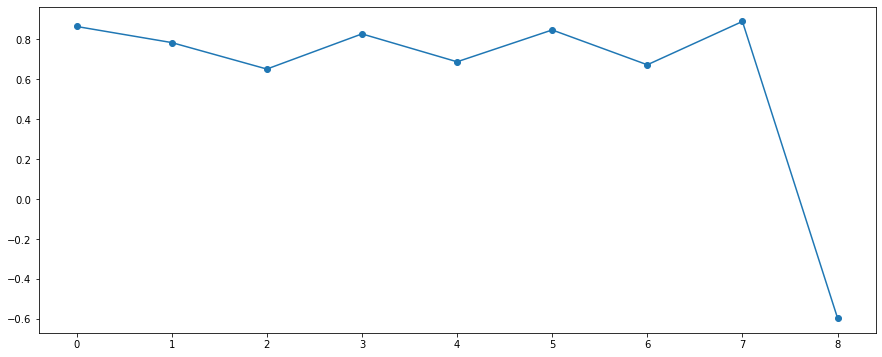

In [64]:
plt.plot(autocorrelation, marker='o');

the further away you get (shift) the lower the correlation ...

In [65]:
df_temp.dropna(inplace=True)

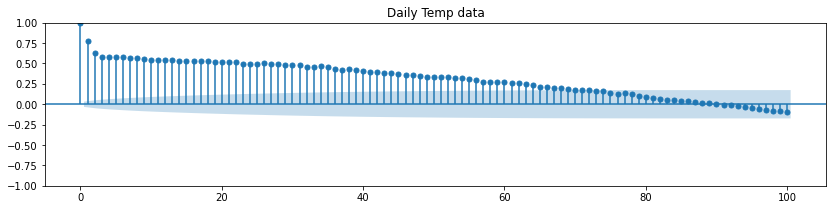

In [66]:
# plot ACF using statsmodel
fig, ax = plt.subplots(figsize=(14, 3))

acf = sm.graphics.tsa.plot_acf(df_temp.Temp.values, lags = 100, title='Daily Temp data', ax=ax)

#### Example - 2 - temp data 

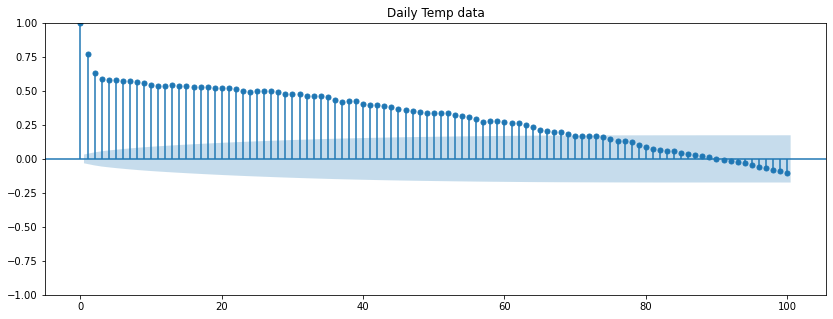

In [67]:
# plot ACF using statsmodel
fig, ax = plt.subplots(figsize=(14, 5))

acf = sm.graphics.tsa.plot_acf(df_temp.dropna().Temp, lags = 100, title='Daily Temp data', ax=ax)

---------------------------------------
#### Partial autocorrelation - PACF
-------------------------------------
The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the __partial autocorrelation__ function removes. 

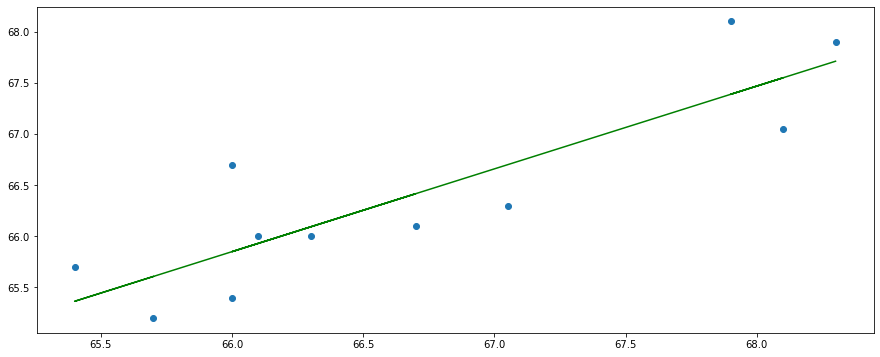

In [68]:
shift=1
temp_shift         = temps[:-shift]
temp_minus_shift   = temps[  shift:]

plt.scatter(temp_minus_shift, temp_shift)

# fit the day 1 and day-minus-1 temp and find the regression line and residuals
slope, intercept = np.polyfit(temp_minus_shift, temp_shift, 1)

plt.plot(temp_minus_shift, intercept + slope* temp_minus_shift, c='g');

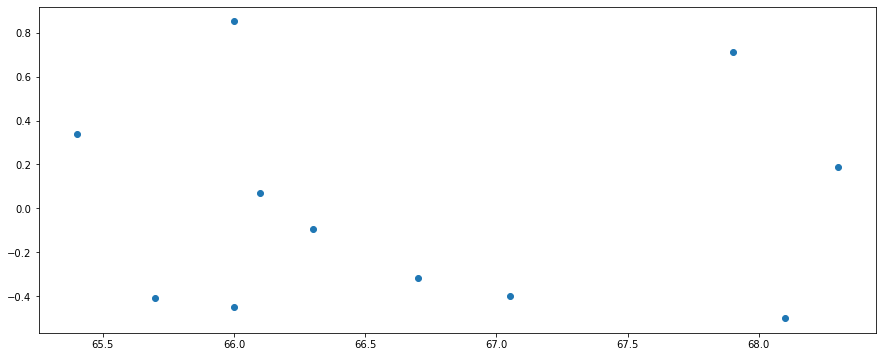

In [69]:
# residual plot
residuals = find_temp_error(temp_minus_shift, temp_shift, intercept, slope)

plt.scatter(temp_minus_shift, residuals)

Now we are going to plot the residuals from day -1 and day-2. 

Fit a line to that scatter

find the residuals...

In [70]:
# partial autocorrelation
pac = []

# start by treating the data as residuals
residuals = temps

for shift in range(1, 10):
    temp_shift         = temps[:-shift]
    temp_minus_shift   = temps[shift:]
    
    correlation = np.corrcoef(temp_shift, residuals[shift:])[0, 1]
    pac.append(correlation)
    
    # fit the new day's data and find the residuals
    slope, intercept = np.polyfit(temp_shift, residuals[shift:], 1)
    
    estimate = intercept + slope * temps[:-shift]
    
    # update the residuals
    residuals[shift:] = residuals[shift:] - estimate
    
pac   

[0.8648224365885038,
 -0.40927994726512107,
 0.12609913911126736,
 -0.18056701374947953,
 0.1681236613841297,
 -0.7741584857394633,
 -0.2975609472613164,
 0.21659393084511297,
 0.8605173448608836]

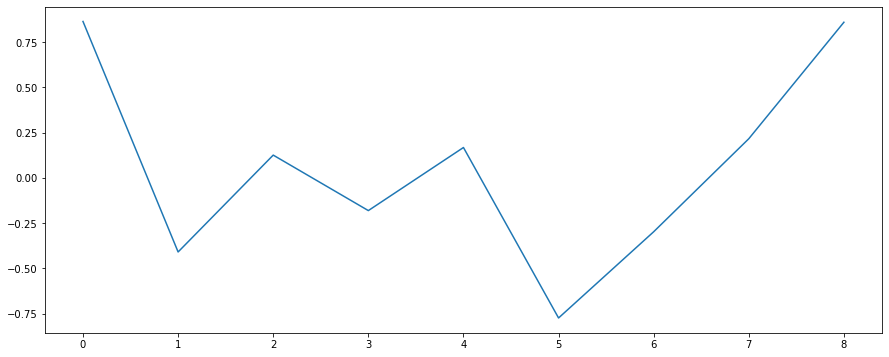

In [71]:
plt.plot(pac);

### Example - 2

C:\Users\19144\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


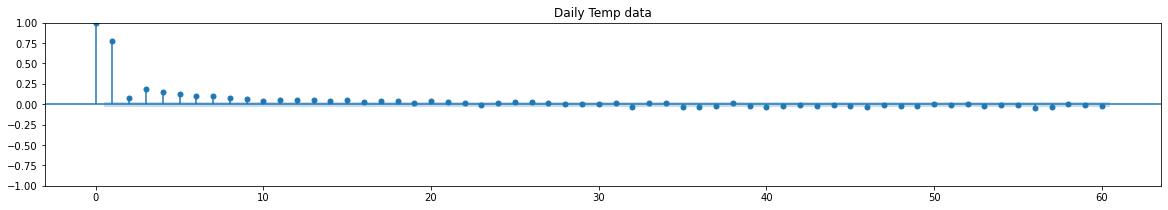

In [72]:
fig, ax = plt.subplots(figsize=(20, 3))

pacf = sm.graphics.tsa.plot_pacf(df_temp.Temp.values, lags = 60, title='Daily Temp data', ax=ax)

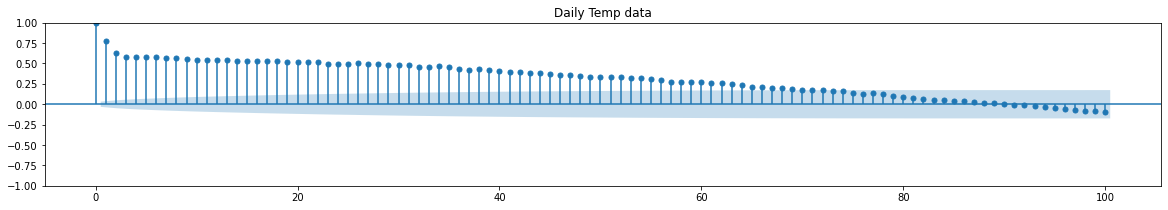

In [73]:
# plot ACF using statsmodel
fig, ax = plt.subplots(figsize=(20, 3))

acf = sm.graphics.tsa.plot_acf(df_temp.Temp.values, lags = 100, title='Daily Temp data', ax=ax)

C:\Users\19144\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


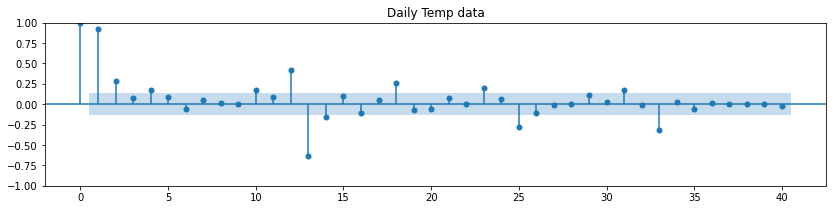

In [74]:
fig, ax = plt.subplots(figsize=(14, 3))
pacf = sm.graphics.tsa.plot_pacf(df_a10.value, lags = 40, title='Daily Temp data', ax=ax)

----------------------
#### Summary
-------------------------

ACF and PACF plots: 

- After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 

- By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed. 

- ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself. 
- PACF plot: is a plot of the partial correlation coefficients between the series and lags of itself.

A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags. 

The autocorrelation of a time series Y at lag 1 is the coefficient of correlation between Yt and Yt-1, which is presumably also the correlation between Yt-1 and Yt-2. 

But if Yt is correlated with Yt-1, and Yt-1 is equally correlated with Yt-2, then we should also expect to find correlation between Yt and Yt-2. In fact, the amount of correlation we should expect at lag 2 is precisely the square of the lag-1 correlation. Thus, the correlation at lag 1 "propagates" to lag 2 and presumably to higher-order lags. 

The partial autocorrelation at lag 2 is therefore the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1.

#### test for serial correlation - Durbin-Watson statistic.

The DW statistic will lie in the 0-4 range, 
- __near 2__  - indicating no first-order serial correlation. 
- __from 0 and below 2__ - Positive serial correlation 
- __from 2 and to 4__ - negative serial correlation

In [75]:
sm.stats.durbin_watson(df_ss.value.values)

0.18432133836026476

C:\Users\19144\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


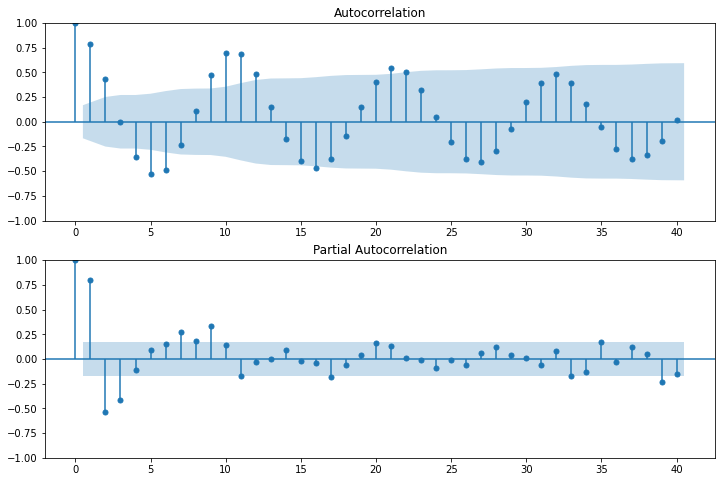

In [76]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ss.value.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ss.value.values, lags=40, ax=ax2)

#### airline passengers data

In [77]:
location = r'D:\MYLEARN\datasets\AirPassengers.csv'

In [78]:
df = pd.read_csv(location)
df

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\MYLEARN\\datasets\\AirPassengers.csv'

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

NameError: name 'df' is not defined

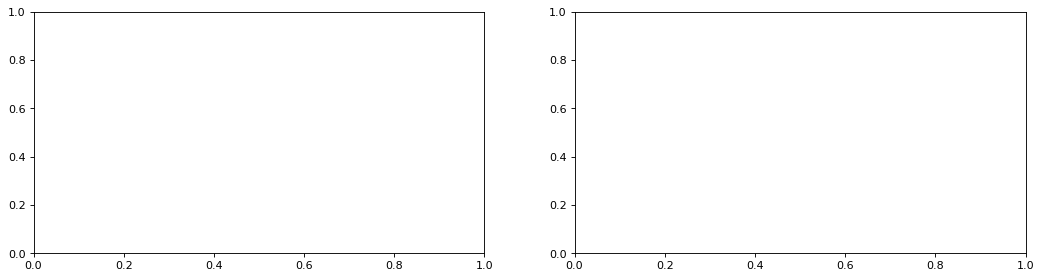

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4), dpi= 80)

ax1=plot_acf(df['#Passengers'].tolist(),  ax=ax1, lags=50)
ax2=plot_pacf(df['#Passengers'].tolist(), ax=ax2, lags=20)

#### Basic ARIMA - demo - determine the AR and MA terms
-------------------------------------------

In [171]:
location = r"D:\MYLEARN\datasets\FBExample.csv"

In [174]:
data = pd.read_csv(location)

# set date column as index
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.columns = ['value']
data.head()

,value
Date,
2016-11-21,121.769997
2016-11-22,121.470001
2016-11-23,120.839996
2016-11-25,120.379997
2016-11-28,120.410004


In [173]:
# data = df_temp.dropna().Temp.values
data = df_a10.value
# data = df_ss.value

In [175]:
series = data.values

#### First check if the data has a trend

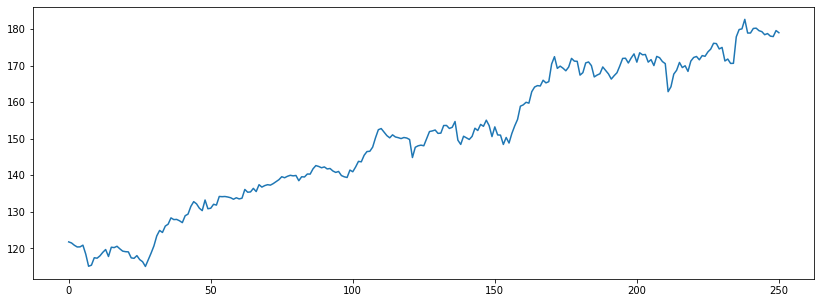

In [176]:
plt.figure(figsize=(14, 5))
plt.plot(series);

In [177]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(series)),
                                              series,
                                              1,
                                              full=True)

mse = residuals[0]/(len(series))
nrmse = np.sqrt(mse)/(series.max() - series.min())

print('Slope ' + str(coefficients[0]))
print('Coeff ' + str(coefficients))
print('NRMSE: ' + str(nrmse))

Slope [0.25876388]
Coeff [[  0.25876388]
 [117.58806133]]
NRMSE: 0.05258209256422287


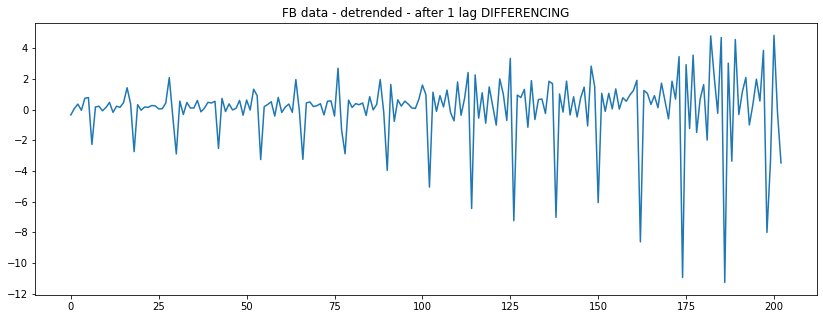

In [55]:
# detrend - differencing
X    = series

diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
    
series = diff

plt.figure(figsize=(14, 5))
plt.title("FB data - detrended - after 1 lag DIFFERENCING")

plt.plot(series);

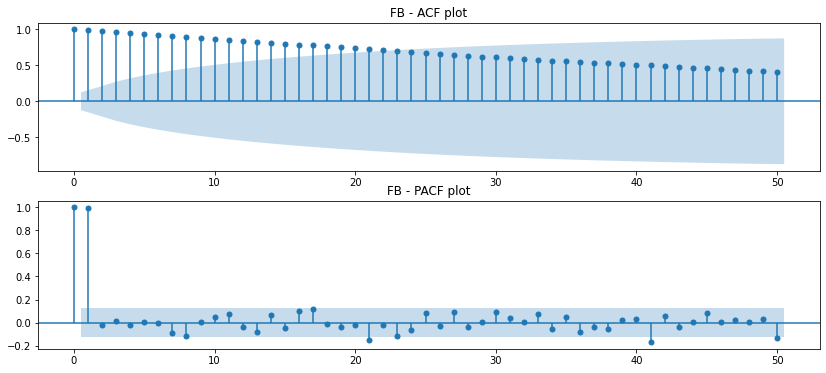

In [178]:
# plot ACF using statsmodel
fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

acf  = sm.graphics.tsa.plot_acf(series,  lags = 50, title='FB - ACF plot',  ax=axes[0])
pacf = sm.graphics.tsa.plot_pacf(series, lags = 50, title='FB - PACF plot', ax=axes[1])

use PACF significant values for the AR order - in this case 1 (FIRST ORDER AR)

use  ACF significant values for the MA order - in this case 1 (FIRST ORDER MA)

In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
model = ARIMA(diff, order=(1, 1, 0))

D:\ANACONDA1\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [61]:
model_fit = model.fit()

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  202
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -498.632
Method:                       css-mle   S.D. of innovations              2.853
Date:                Fri, 02 Apr 2021   AIC                           1003.264
Time:                        12:29:45   BIC                           1013.189
Sample:                             1   HQIC                          1007.279
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0100      0.123     -0.082      0.935      -0.251       0.231
ar.L1.D.y     -0.6340      0.054    -11.718      0.000      -0.740      -0.528
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5774           +0.0000j            1.5774            0.5000
-----------------------------------------------------------------------------
"""

In [63]:
model_fit.resid

array([ 4.27078880e-01,  5.68257941e-01, -2.05259189e-01,  5.45983223e-01,
        5.55954694e-01, -3.01307354e+00,  5.24240068e-01,  1.61423213e+00,
       -2.49524758e-01,  4.88017910e-02,  4.80369986e-01, -4.24332546e-01,
        4.11733731e-03,  1.97287706e-01,  2.86072419e-01,  1.17794194e+00,
       -4.16210887e-01, -3.76722771e+00,  1.09934991e+00,  1.59861407e+00,
       -2.36492079e-03,  1.22175839e-01,  1.21014314e-01,  7.42453062e-02,
       -1.95931872e-01, -9.77532196e-02,  3.91279455e-01,  1.90909257e+00,
       -1.46571003e+00, -4.03216445e+00,  1.91143386e+00,  1.32765639e+00,
        2.47929152e-01,  1.53146254e-01, -2.10001630e-01,  5.08707735e-01,
       -4.16442705e-01, -2.12004833e-01,  5.45589321e-01,  2.12853510e-01,
        1.04313821e-01, -2.98958938e+00,  1.33155059e+00,  1.22783609e+00,
       -3.05224493e-02, -6.35287448e-02, -1.24507523e-01,  5.98688310e-01,
       -6.21701010e-01,  3.94961547e-01, -7.89303112e-03,  9.58403939e-01,
        4.60149423e-01, -

In [65]:
model_fit.resid.mean()

0.0013403710771128592

In [66]:
residuals = model_fit.resid

df_residuals = pd.DataFrame(residuals)

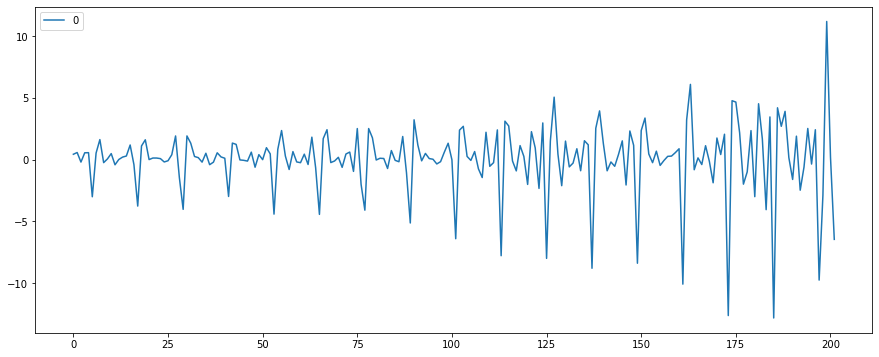

In [67]:
df_residuals.plot();

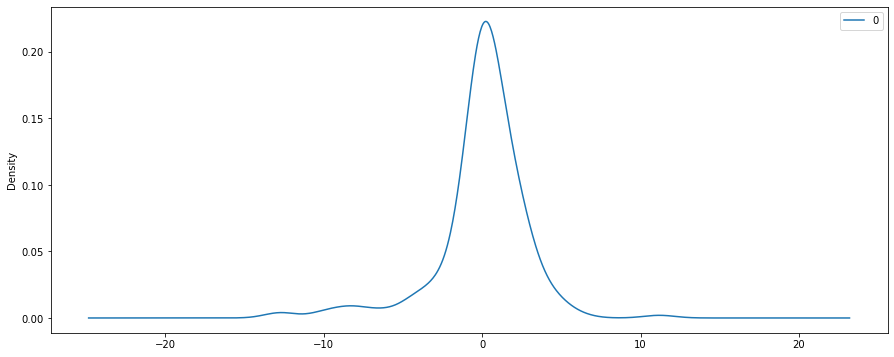

In [68]:
df_residuals.plot(kind='kde');

In [69]:
df_residuals.describe()

,0
count,202.000000
mean,0.001340
std,2.859844
min,-12.826959
25%,-0.422360
50%,0.197365
75%,1.325617
max,11.178551


#### Test your knowledge

- which model (AR or MA) would you use

### Example 1

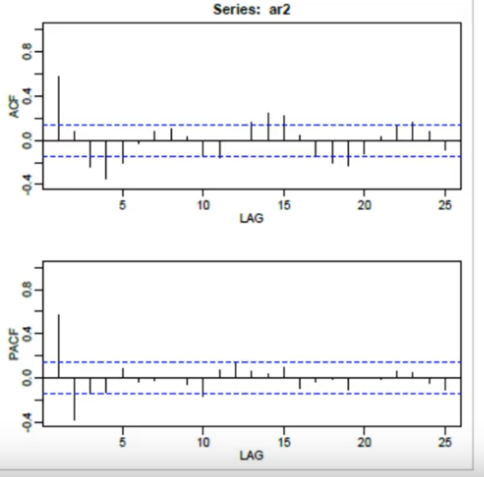

what are the AR and MA terms?

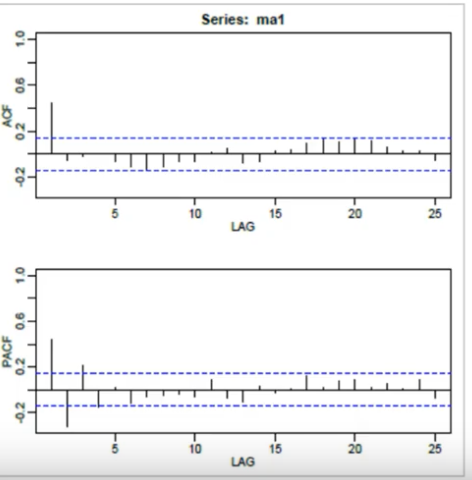

what are the AR and MA terms?

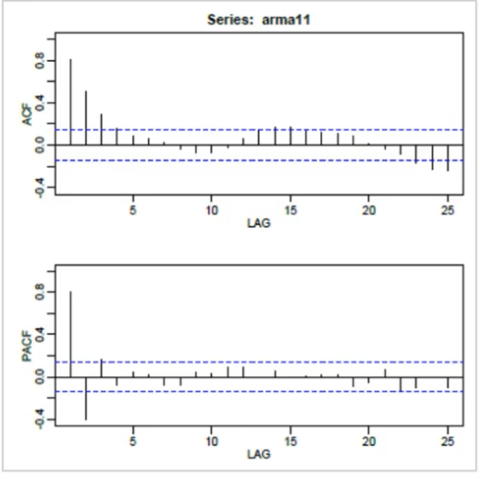

what are the AR and MA terms?

ARMA or ARIMA?